####Introdução ao Machine Learning

Machine Learning (ML) capacita computadores a aprenderem padrões e tomar decisões sem serem explicitamente programados para cada tarefa. Através de algoritmos, os sistemas analisam grandes volumes de dados para identificar regularidades e construir modelos preditivos ou descritivos. Esses modelos podem então ser usados para fazer previsões em novos dados, classificar informações, detectar anomalias ou automatizar processos. O ML abrange diversas técnicas, desde regressão linear até redes neurais complexas, impulsionando avanços em áreas como reconhecimento de voz, visão computacional e sistemas de recomendação. Seu foco é permitir que as máquinas melhorem seu desempenho com a experiência.

##Importação da Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###Carregando os Dados

In [2]:
data = r'/content/drive/MyDrive/dscience-infinity/dados/train.csv'
df = pd.read_csv(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Análise Exploratória

In [3]:
df.drop(["PassengerId", "Name", "Ticket","Cabin", "Embarked"], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [5]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [6]:
df['Sex'] = df['Sex'].map({'male': -1, 'female': 1})

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,-1,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,-1,35.0,0,0,8.0500


In [8]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


###Estudar -> Nerd dos dados

<Axes: >

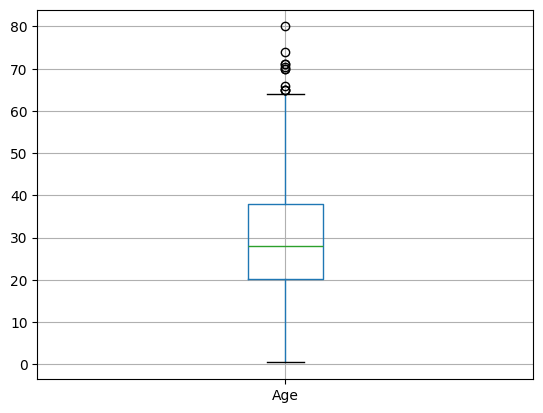

In [9]:
df.boxplot(column=['Age'])

####Imputação de dados ausentes

##Mediada usada -> a meidian()

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())

####Divisão dos dados de treino e de teste

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('Survived', axis=1) # -> features (caracteristicas)
y = df['Survived'] # -> label (classe)

#Conjunto de dados de treino e de teste

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

####Criação do modelo


###Modelo escolhido -> Regressão Logistica

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

###Verificando o modelo

In [17]:
model.coef_

array([[-0.86401508,  1.28324291, -0.02950178, -0.29677015, -0.13174724,
         0.00405317]])

####Explicação do parametro do modelo (.coef_)

O parâmetro .coef_ (com um sublinhado no final) é um atributo de modelos lineares de classificação e regressão no scikit-learn, como a Regressão Logística (LogisticRegression) e a Regressão Linear (LinearRegression).

No contexto específico de um modelo de Regressão Logística (para classificação binária), o .coef_ representa os coeficientes (ou pesos) associados a cada uma das variáveis preditoras (features) no seu modelo.

###Gerando previsão

In [18]:
previsao = model.predict(X_test)
previsao

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0])

In [19]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
715,0
525,0
381,1
140,0


###Medindo o desempenho do modelo

####Métrica utilizada -> accuracy_score()

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, previsao)*100

81.69491525423729

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [29]:
# Inicializar o classificador Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators controla o número de árvores

# Treinar o modelo com os dados de treino
random_forest.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = random_forest.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Random Forest: {accuracy:.2f}')

Acurácia do Random Forest: 0.82


###Explicação:

O conjunto de dados do Titanic é um clássico em machine learning, contendo informações de passageiros a bordo do fatídico navio. O objetivo principal é prever a sobrevivência com base em atributos como classe social, sexo, idade e número de parentes a bordo. Um modelo RandomForest alcançando uma acurácia de 82% demonstra uma capacidade razoável de capturar os padrões complexos que influenciaram a sobrevivência, indicando que combinações não lineares das features foram importantes para a predição. Sua robustez a overfitting e capacidade de lidar com diferentes tipos de dados contribuíram para um desempenho sólido.

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fazer previsões (caso já não tenha feito)
y_pred = random_forest.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[44 10]
 [ 6 30]]


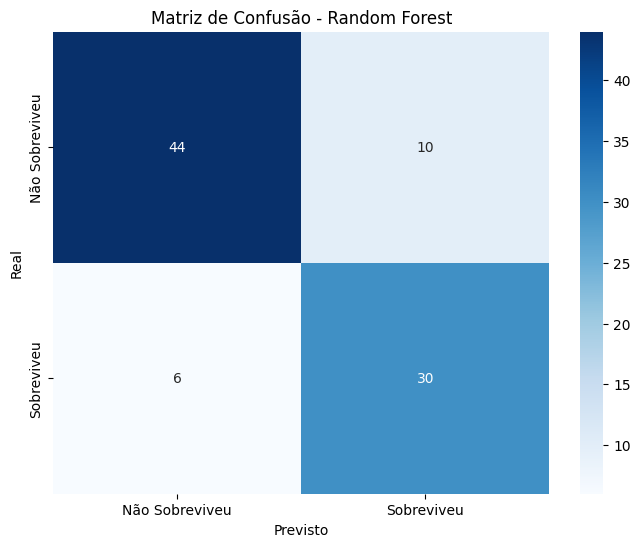

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

####Matriz de Confusão (confusion matrix)

A matriz de confusão é uma ferramenta fundamental para avaliar o desempenho de um modelo de classificação. Ela fornece uma visão detalhada dos acertos e erros cometidos pelo modelo ao fazer previsões em relação aos valores reais (ou verdadeiros).
Imagine que você tem um problema de classificação binária, como o nosso caso do Titanic (sobreviveu ou não sobreviveu). A matriz de confusão para esse tipo de problema é uma tabela 2x2, com as seguintes dimensões:
•	Eixo das linhas: Representa as classes reais (os valores verdadeiros que temos para cada amostra).
•	Eixo das colunas: Representa as classes previstas pelo seu modelo.
As células dessa matriz são preenchidas com a contagem de amostras que se encaixam em cada combinação de classe real e classe prevista:

![Texto alternativo da imagem](https://cdn1.gnarususercontent.com.br/1/498622/01bf6306-57d4-4df0-a2d9-01b13e1c36a9.png)



A técnica SMOTE (Synthetic Minority Over-sampling Technique)

 visa equilibrar classes desbalanceadas. Para a classe minoritária, ela seleciona uma amostra e seus vizinhos mais próximos. Em seguida, cria novas amostras sintéticas ao longo dos segmentos que unem a amostra aos seus vizinhos. Isso aumenta o número de amostras da classe minoritária, sem apenas duplicar as existentes, ajudando o modelo a aprender melhor essa classe. O SMOTE é aplicado apenas no conjunto de treinamento para evitar viés no teste.

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treine seu modelo Random Forest com os dados resampled
random_forest_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_balanced.fit(X_train_resampled, y_train_resampled)

# Avalie o modelo nos dados de teste originais
y_pred_balanced = random_forest_balanced.predict(X_test)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
print(f'Acurácia do Random Forest (com SMOTE): {accuracy_balanced:.2f}')
print('Matriz de Confusão (com SMOTE):\n', cm_balanced)

Acurácia do Random Forest (com SMOTE): 0.81
Matriz de Confusão (com SMOTE):
 [[43 11]
 [ 6 30]]


####Observação.

Mesmo após aplicar SMOTE, a ausência de melhora no desempenho do modelo de classificação do Titanic pode indicar que a geração de amostras sintéticas não capturou a complexidade da classe minoritária ou introduziu ruído. É crucial lembrar que técnicas de oversampling como SMOTE devem ser aplicadas com cautela, restringindo-se ao conjunto de treinamento para evitar o vazamento de informações para o conjunto de teste, o que levaria a uma avaliação otimista e irreal do modelo em dados não vistos. Além disso, o oversampling excessivo pode levar ao overfitting, onde o modelo aprende demais as características específicas das amostras sintéticas, generalizando mal para novos dados. A escolha da técnica de balanceamento e seus parâmetros deve ser cuidadosamente avaliada através de validação cruzada para garantir que o modelo aprenda padrões genuínos e não artefatos do processo de balanceamento.

###Previsao do modelo depois do balanceamento

In [35]:
y_pred_balanced

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [36]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
493,0
215,1
309,1
822,0


In [37]:
accur = accuracy_score(y_test, y_pred_balanced)
print(f'Acurácia do modelo depois do balanceamento: {accur:.2f}')

Acurácia do modelo depois do balanceamento: 0.81


In [34]:
import plotly.graph_objects as go
import numpy as np

# Obter os rótulos das classes (assumindo que 0 é 'Não Sobreviveu' e 1 é 'Sobreviveu')
class_names = ['Não Sobreviveu', 'Sobreviveu']

# Criar o heatmap com Plotly
fig = go.Figure(data=go.Heatmap(z=cm_balanced,
                                 x=class_names,
                                 y=class_names,
                                 colorscale='Blues',
                                 text=np.array([['TN', 'FP'], ['FN', 'TP']]), # Adiciona rótulos TP, TN, FP, FN
                                 texttemplate="%{text}<br>(%{z})",
                                 textfont={"size": 15}))

# Atualizar o layout para melhor visualização
fig.update_layout(title='Matriz de Confusão - Random Forest (com SMOTE)',
                  xaxis_title='Previsto',
                  yaxis_title='Real',
                  yaxis_autorange='reversed') # Inverte o eixo y para corresponder à matriz tradicional

fig.show()

In [38]:
from sklearn.model_selection import cross_val_score, KFold

# Inicializar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Definir a estratégia de validação cruzada (por exemplo, 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42) # shuffle=True embaralha os dados antes de dividir

# Aplicar a validação cruzada e obter as métricas de desempenho para cada fold
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy') # Você pode mudar 'accuracy' para outra métrica

print(f'Acurácia em cada fold: {scores}')
print(f'Acurácia média (validação cruzada): {scores.mean():.2f}')
print(f'Desvio padrão da acurácia: {scores.std():.2f}')

Acurácia em cada fold: [0.80446927 0.80898876 0.80898876 0.81460674 0.83146067]
Acurácia média (validação cruzada): 0.81
Desvio padrão da acurácia: 0.01


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': [None, 'balanced']
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy') # Use a mesma estratégia de CV que antes
grid_search.fit(X_train, y_train)

print(f'Melhores hiperparâmetros encontrados: {grid_search.best_params_}')
print(f'Melhor acurácia (validação cruzada): {grid_search.best_score_:.2f}')

best_model = grid_search.best_estimator_

# Avalie o melhor modelo nos dados de teste
y_pred_best = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_best)
print(f'Acurácia do melhor modelo nos dados de teste: {accuracy_test:.2f}')

Melhores hiperparâmetros encontrados: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Melhor acurácia (validação cruzada): 0.84
Acurácia do melhor modelo nos dados de teste: 0.82


###Explicação da escolha do melhor modelo:

Ao usar GridSearchCV com validação cruzada, você automatiza a busca pela melhor combinação de hiperparâmetros para seu modelo. A validação cruzada garante que cada configuração de hiperparâmetros seja avaliada em múltiplos subconjuntos dos dados de treinamento, fornecendo uma estimativa robusta do desempenho e reduzindo o risco de overfitting aos dados de treinamento específicos. Isso resulta em um modelo com maior probabilidade de generalizar bem para dados não vistos, pois a escolha dos hiperparâmetros é baseada em um desempenho consistente em diferentes partições dos dados, otimizando a capacidade preditiva do modelo.

In [41]:
lista_de_dados = [
    "Empresa",
    "centro",
    "município",
    "descricacao",
    "mês",
    "fornecedor",
    "nome do pretado",
    "cnpj",
    "muni fornecedor",
    "categoria",
    "numero_nf",
    "exercício",
    "ncm_atividade",
    "data_emissao",
    "data_lanc",
    "valor_total_nf",
    "aliq_",
    "ali_ss",
    "valor_iss",
    "ss_a_escolher",
    "confronto_pref",
    "analise-conciliac",
    "base_calc_corrig",
    "aliq_iss_corrig",
    "centro_corret",
    "cnpj_cooreto",
    "data_emissao_corret",
    "nf_correta",
    "modif_por",
    "registro_modif_man",
    "matricula",
    "usuário_super_net",
]

print(lista_de_dados)

['Empresa', 'centro', 'município', 'descricacao', 'mês', 'fornecedor', 'nome do pretado', 'cnpj', 'muni fornecedor', 'categoria', 'numero_nf', 'exercício', 'ncm_atividade', 'data_emissao', 'data_lanc', 'valor_total_nf', 'aliq_', 'ali_ss', 'valor_iss', 'ss_a_escolher', 'confronto_pref', 'analise-conciliac', 'base_calc_corrig', 'aliq_iss_corrig', 'centro_corret', 'cnpj_cooreto', 'data_emissao_corret', 'nf_correta', 'modif_por', 'registro_modif_man', 'matricula', 'usuário_super_net']


02.03.2025 12500
04.05.2025 35400
08.05.2025 4500
01.02.2025 90012
04.04.2025 47800

In [ ]:
df_novo['Data de emissao'] = pd.to_datetime(df_novo['Data de emissao'], format='%d/%m/%Y', errors='coerce')